In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import altair as alt

# From the proposal
- Analysis: Comparison of IMDb and Rotten Tomatoes ratings between the two platforms
- <b>Question(s): Which platform has more high-rated shows based on IMDb and Rotten Tomatoes ratings? Which platform's average rating is higher? How have these ratings changed in recent years?</b>
- Relevant dataset: Primary dataset (Movies and TV shows on Netflix and Amazon Prime)
- Relevant columns: 'Year' (production year), 'IMDb', 'Rotten Tomatoes', 'Netflix' and 'Amazon Prime Video' (boolean)
- Technique/Approach: As all the required data are in a single dataset for this particular analysis, we would likely be able to answer questions by grouping and aggregation. We can group possibly on type (movie/tv show) and use mean as aggregation. We will use multi-bar charts. For analyzing the trends of ratings over the years, we can group by years and calculate the average ratings each year. 
- <b>What we will learn: We would be able to learn which platform’s shows have higher ratings, which might be related to the popularity of the platform itself.</b>
- Challenge(s): Rotten Tomatoes and IMDb have different ratings systems that may be calculated in different ways. This will pose a challenge for analysis on ratings.

In [49]:
df= pd.read_csv('data/main_final_2.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11395 entries, 0 to 11394
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             11395 non-null  object 
 1   Year              11395 non-null  int64  
 2   Age               10325 non-null  object 
 3   Amazon            11395 non-null  int64  
 4   IMDb              10550 non-null  object 
 5   Netflix           11395 non-null  int64  
 6   Rotten Tomatoes   11388 non-null  object 
 7   Type              11285 non-null  object 
 8   country           10550 non-null  object 
 9   emmy_nomination   59 non-null     float64
 10  emmy_win          59 non-null     float64
 11  genres            10339 non-null  object 
 12  oscar_nomination  247 non-null    float64
 13  oscar_win         247 non-null    float64
 14  runtime           9408 non-null   float64
 15  votes             11395 non-null  int64  
dtypes: float64(5), int64(4), object(7)
memor

In [51]:
df2 = df.copy(deep = True)

In [52]:
# Drop columns that are not required for this analysis.
col_to_drop = ['emmy_nomination', 'emmy_win', 'oscar_nomination', 'oscar_win']
df.drop(col_to_drop, axis=1, inplace=True)

In [53]:
# df[(df['Netflix']==1) & (df['Amazon']==1)]
# 215 titles are available on both Netflix and Amazon.

In [54]:
# Clean up the IMDb and Rotten Tomatoes columns and normalize IMDb ratings
# so that both columns have the same scale and format.
df['IMDb'] = df['IMDb'].str.replace("/10","")
df['IMDb'] = df['IMDb'].astype(float)*10
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace("/100","")
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].astype(float)

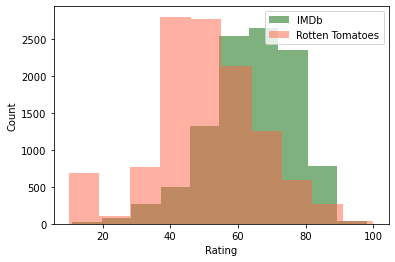

In [55]:
plt.hist(df['IMDb'], alpha=0.5, label="IMDb", color='darkgreen')
plt.hist(df['Rotten Tomatoes'], alpha=0.5, label="Rotten Tomatoes", color='tomato')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend()
# IMDb ratings are generally higher.

In [56]:
net_im_median = df[df['Netflix']==1]['IMDb'].median()
net_im_mean = df[df['Netflix']==1]['IMDb'].mean()
ama_im_median = df[df['Amazon']==1]['IMDb'].median()
ama_im_mean = df[df['Amazon']==1]['IMDb'].mean()

net_rt_median = df[df['Netflix']==1]['Rotten Tomatoes'].median()
net_rt_mean = df[df['Netflix']==1]['Rotten Tomatoes'].mean()
ama_rt_median = df[df['Amazon']==1]['Rotten Tomatoes'].median()
ama_rt_mean = df[df['Amazon']==1]['Rotten Tomatoes'].mean()

In [57]:
# fig, axes = plt.subplots(2)
# fig.set_size_inches(10,12)

# axes[0].set_title('IMDb')
# axes[0].hist(df[df['Amazon']==1]['IMDb'], alpha=0.5, label='Amazon IMDb')
# axes[0].hist(df[df['Netflix']==1]['IMDb'], alpha=0.5, label='Netflix IMDb')
# axes[0].set_xlabel('Rating')
# axes[0].set_ylabel('Count')
# axes[0].legend()

# axes[0].axvline(ama_im_median, color='darkblue')
# axes[0].text(ama_im_median-16, 150, \
#             'Amazon Median\n                ('+str(round(ama_im_median,1))+')', \
#             color='darkblue', weight='bold')

# axes[0].axvline(net_im_median, color='darkred')
# axes[0].text(net_im_median+1, 150, \
#             'Netflix Median\n('+str(round(net_im_median,1))+')', \
#             color='darkred', weight='bold')

# axes[1].set_title('Rotten Tomatoes')
# axes[1].hist(df[df['Amazon']==1]['Rotten Tomatoes'], alpha=0.5, label='Amazon Rotten Tomatoes')
# axes[1].hist(df[df['Netflix']==1]['Rotten Tomatoes'], alpha=0.5, label='Netflix Rotten Tomatoes')
# axes[1].set_xlabel('Rating')
# axes[1].set_ylabel('Count')
# axes[1].legend()

# axes[1].axvline(ama_rt_median, color='darkblue')
# axes[1].text(ama_rt_median-17, 150, \
#             'Amazon Median\n                ('+str(round(ama_rt_median,1))+')', \
#             color='darkblue', weight='bold')

# axes[1].axvline(net_rt_median, color='darkred')
# axes[1].text(net_rt_median+1, 150, \
#             'Netflix Median\n('+str(round(net_rt_median,1))+')', \
#             color='darkred', weight='bold');

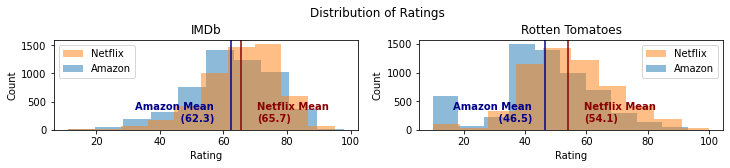

In [58]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(12,2)

axes[0].set_title('IMDb')
axes[0].hist(df[df['Amazon']==1]['IMDb'], alpha=0.5, label='Amazon')
axes[0].hist(df[df['Netflix']==1]['IMDb'], alpha=0.5, label='Netflix')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[idx] for idx in [1,0]],[labels[idx] for idx in [1,0]])

axes[0].axvline(ama_im_mean, color='darkblue')
axes[0].text(ama_im_mean-30, 150, \
            'Amazon Mean\n             ('+str(round(ama_im_mean,1))+')', \
            color='darkblue', weight='bold')

axes[0].axvline(net_im_mean, color='darkred')
axes[0].text(net_im_mean+5, 150, \
            'Netflix Mean\n('+str(round(net_im_mean,1))+')', \
            color='darkred', weight='bold')

axes[1].set_title('Rotten Tomatoes')
axes[1].hist(df[df['Amazon']==1]['Rotten Tomatoes'], alpha=0.5, label='Amazon')
axes[1].hist(df[df['Netflix']==1]['Rotten Tomatoes'], alpha=0.5, label='Netflix')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Count')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend([handles[idx] for idx in [1,0]],[labels[idx] for idx in [1,0]])

axes[1].axvline(ama_rt_mean, color='darkblue')
axes[1].text(ama_rt_mean-30, 150, \
            'Amazon Mean\n             ('+str(round(ama_rt_mean,1))+')', \
            color='darkblue', weight='bold')

axes[1].axvline(net_rt_mean, color='darkred')
axes[1].text(net_rt_mean+5, 150, \
            'Netflix Mean\n('+str(round(net_rt_mean,1))+')', \
            color='darkred', weight='bold')

fig.suptitle('Distribution of Ratings')
fig.subplots_adjust(top=0.75);

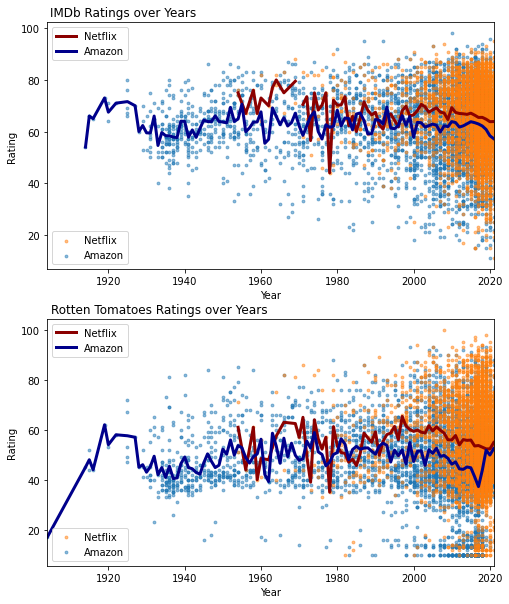

In [59]:
fig, axes = plt.subplots(2)
fig.set_size_inches(8,10)

p_1, = axes[0].plot(df[df['Netflix']==1][['Year', 'IMDb']].groupby('Year').mean(), label='Netflix', linewidth=3, color='darkred')
p_2, = axes[0].plot(df[df['Amazon']==1][['Year', 'IMDb']].groupby('Year').mean(), label='Amazon', linewidth=3, color='darkblue')
axes[0].set_title('IMDb Ratings over Years', x=0.17)
# axes[0].set_xlabel('Year')
# axes[0].set_ylabel('Rating')
l_1 = axes[0].legend([p_1, p_2], ['Netflix', 'Amazon'], loc='upper left')

p_3 = axes[0].scatter(x='Year', y='IMDb', data=df[df['Amazon']==1], s=8, alpha=0.5, label='Amazon')
p_4 = axes[0].scatter(x='Year', y='IMDb', data=df[df['Netflix']==1], s=8, alpha=0.5, label='Netflix', color='#ff7f0e')
axes[0].legend([p_4, p_3], ['Netflix', 'Amazon'], loc='lower left')
axes[0].add_artist(l_1)
axes[0].set_xlim([min(df.Year), max(df.Year)])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Rating')
# Most shows on Netflix with IMDb scores are very recent,
# whereas Amazon clearly has a lot more shows before 1980.

p_5, = axes[1].plot(df[df['Netflix']==1][['Year', 'Rotten Tomatoes']].groupby('Year').mean(), label='Netflix', linewidth=3, color='darkred')
p_6, = axes[1].plot(df[df['Amazon']==1][['Year', 'Rotten Tomatoes']].groupby('Year').mean(), label='Amazon', linewidth=3, color='darkblue')
axes[1].set_title('Rotten Tomatoes Ratings over Years', x=0.25)
# axes[1].set_xlabel('Year')
# axes[1].set_ylabel('Rating')
l_2 = axes[1].legend([p_5, p_6], ['Netflix', 'Amazon'], loc='upper left')

p_7 = axes[1].scatter(x='Year', y='Rotten Tomatoes', data=df[df['Amazon']==1], s=8, alpha=0.5, label='Amazon')
p_8 = axes[1].scatter(x='Year', y='Rotten Tomatoes', data=df[df['Netflix']==1], s=8, alpha=0.5, label='Netflix', color='#ff7f0e')
axes[1].legend([p_8, p_7], ['Netflix', 'Amazon'], loc='lower left')
axes[1].add_artist(l_2)
axes[1].set_xlim([min(df.Year), max(df.Year)])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Rating');
# Average ratings of shows on Netflix are generally higher than Amazon
# for both IMDb and Rotten Tomatoes.

# The trends in recent years are generally similar for Netflix and Amazon.
# For both Netflix and Amazon, there are shows with very low Rotten Tomatoes scores in recent years.

# Recent shows on Amazon has rapid increase in Rotten Tomatoes ratings, but still lower than Netflix.

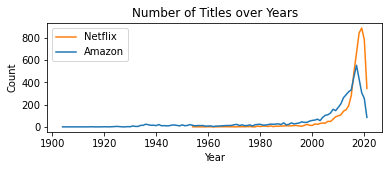

In [60]:
plt.figure(figsize=(6, 2))
plt.plot(df[df['Netflix']==1].groupby('Year').count().iloc[:,0], label='Netflix', color='#ff7f0e')
plt.plot(df[df['Amazon']==1].groupby('Year').count().iloc[:,0], label='Amazon')
plt.title('Number of Titles over Years')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count');
# It is clear that Netflix does not have shows before around 1950,
# at least according to the data we have.

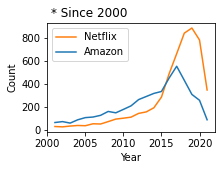

In [61]:
plt.figure(figsize=(3, 2))
plt.plot(df[(df['Netflix']==1) & (df['Year']>2000)].groupby('Year').count().iloc[:,0], label='Netflix', color='#ff7f0e')
plt.plot(df[(df['Amazon']==1) & (df['Year']>2000)].groupby('Year').count().iloc[:,0], label='Amazon')
plt.title('* Since 2000', x=0.25)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count');
# Netflix has more shows that were released/produced after 2015.

In [62]:
# Insights - why Netflix stays as the No.1 streaming platform?
# 1) On the whole, shows/movies on Netflix have higher scores from both IMDb and Rotten Tomatoes
# 2) Netflix clearly has more recent shows/movies than Amazon.

In [63]:
df_2 = pd.read_csv('data/main_final_2.csv')
df_2['IMDb'] = df_2['IMDb'].str.replace("/10","")
df_2['IMDb'] = df_2['IMDb'].astype(float)
df_2['IMDb'].corr(df_2['votes'])
# No strong correlation exists between IMDb ratings and number of votes.

0.16645207853505894

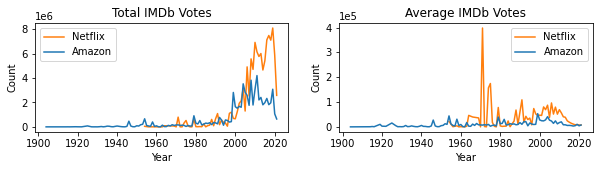

In [64]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(10,2)
axes[0].plot(df_2[df_2['Netflix']==1].groupby('Year').sum().iloc[:,-1], label='Netflix', color='#ff7f0e')
axes[0].plot(df_2[df_2['Amazon']==1].groupby('Year').sum().iloc[:,-1], label='Amazon')
axes[0].set_title('Total IMDb Votes')
axes[0].legend()
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')

axes[1].plot(df_2[df_2['Netflix']==1].groupby('Year').mean().iloc[:,-1], label='Netflix', color='#ff7f0e')
axes[1].plot(df_2[df_2['Amazon']==1].groupby('Year').mean().iloc[:,-1], label='Amazon')
axes[1].set_title('Average IMDb Votes')
axes[1].legend()
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0));

In [65]:
df_2[df_2['votes']==df_2['votes'].max()]

,Title,Year,Age,Amazon,IMDb,Netflix,Rotten Tomatoes,Type,country,emmy_nomination,emmy_win,genres,oscar_nomination,oscar_win,runtime,votes
3160,Fight Club,1999,18+,1,8.8,0,93/100,movie,United States,NaN,NaN,Drama,1.0,0.0,139.0,1979568


In [66]:
df_2[(df_2['Netflix']==1) & (df_2['Year']==1971)]

,Title,Year,Age,Amazon,IMDb,Netflix,Rotten Tomatoes,Type,country,emmy_nomination,emmy_win,genres,oscar_nomination,oscar_win,runtime,votes
198,A Clockwork Orange,1971,R,0,8.3,1,86/100,movie,"United Kingdom, United States",NaN,NaN,"Crime,Sci-Fi",4.0,0.0,136.0,796016
2869,Elaan,1971,TV-14,0,5.8,1,44/100,movie,India,NaN,NaN,"Action,Drama,Musical",NaN,NaN,144.0,61


In [67]:
# These plots are another set of analyses that show that
# titles on Netflix has more user engagement based on IMDb votes.
# That is, movies and shows on Netflix have more total IMDb votes especially in recent decades.
# We can infer that titles that the general public are more interested in, 
# in a sense that they would go to the IMDb site and vote/rate the titles,
# are more likely to be found on Netflix than Amazon in general.

# For the Average IMDb Votes plot, the spike from Netflix in 1971 was
# because of a movie titled "A Clockwork Orange",
# which now has 799k IMDb votes; 796k in the dataset.

In [68]:
# Additional exploration & cleaning

In [69]:

df.country.value_counts()
# Mostly from US and India

United States                                                   4884
India                                                            940
United Kingdom                                                   813
Canada                                                           432
Japan                                                            344
                                                                ... 
India, France                                                      1
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United Kingdom, Belgium                                            1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 504, dtype: int64

In [70]:
df['country'] = df['country'].fillna('Unknown').apply(lambda c: c.split(',')[0] if len(c.split(','))>1 else c)
df['country'].value_counts()

United States       5086
India                966
United Kingdom       926
Unknown              845
Canada               486
                    ... 
Aruba                  1
Congo - Kinshasa       1
Jordan                 1
Liechtenstein          1
Morocco                1
Name: country, Length: 98, dtype: int64

In [71]:
df['genres'] = df['genres'].fillna('Unknown').apply(lambda g: g.split(',')[0] if len(g.split(','))>1 else g)
df['genres'].value_counts()

Comedy                       1906
Drama                        1599
Action                       1378
Unknown                      1056
Documentary                   927
                             ... 
Cult Movies                     1
Movies                          1
Music Videos and Concerts       1
Classic & Cult TV               1
Unscripted                      1
Name: genres, Length: 68, dtype: int64

In [72]:
df[['IMDb', 'country']].groupby('country').count().sort_values(by='IMDb', ascending=False).head(20)

,IMDb
country,
United States,4928
India,946
United Kingdom,896
Canada,471
Japan,348
Unknown,345
France,236
South Korea,224
Spain,193


In [73]:
df[['Rotten Tomatoes', 'country']].groupby('country').count().sort_values(by='Rotten Tomatoes', ascending=False).head(20)
# More Rotten Tomatoes scores where the country is unknown,
# but the rankings by the count of ratings/scores from both IMDb and Rotten Tomatoes are very similar.

,Rotten Tomatoes
country,
United States,5086
India,965
United Kingdom,926
Unknown,840
Canada,486
Japan,354
France,247
South Korea,229
Spain,202


In [74]:
top_20_imdb_country = set(df[['IMDb', 'country']].groupby('country').count().sort_values(by='IMDb', ascending=False)[:20].index)
top_20_rt_country = set(df[['Rotten Tomatoes', 'country']].groupby('country').count().sort_values(by='Rotten Tomatoes', ascending=False)[:20].index)
len(top_20_imdb_country.union(top_20_rt_country))
# The two rankings indeed have the same 20 countries, including 'Unknown'.

20

In [75]:
df[['IMDb', 'Rotten Tomatoes', 'country']].groupby('country').mean().sort_values('IMDb', ascending=False).head(20)

,IMDb,Rotten Tomatoes
country,,
Sri Lanka,85.000000,10.000000
Korea,75.500000,53.500000
Georgia,74.250000,59.000000
Greece,74.000000,64.000000
Iceland,73.714286,63.857143
Bangladesh,72.500000,47.000000
Latvia,71.500000,50.000000
Lebanon,71.142857,43.750000
Namibia,71.000000,41.000000


In [76]:
df[['IMDb', 'Rotten Tomatoes', 'country']].groupby('country').mean().sort_values('Rotten Tomatoes', ascending=False).head(20)

,IMDb,Rotten Tomatoes
country,,
Greece,74.000000,64.000000
Iceland,73.714286,63.857143
Cambodia,63.500000,62.500000
Finland,62.285714,59.571429
Norway,65.476190,59.409091
Georgia,74.250000,59.000000
Yugoslavia,55.500000,58.500000
Afghanistan,67.000000,58.000000
Soviet Union,71.000000,58.000000


In [77]:
# The rankings by the average IMDb and Rotten Tomatoes ratings are quite different.
# Only look at top 20 country by the count of ratings
# to exclude ratings from countries where total number of ratings is small.
sub_df = df[df['country'].isin(top_20_imdb_country.union(top_20_rt_country))][['IMDb', 'Rotten Tomatoes', 'country']]
sub_df.groupby('country').mean().sort_values('IMDb', ascending=False)

,IMDb,Rotten Tomatoes
country,,
Japan,70.425287,53.118644
South Korea,70.169643,49.550218
China,67.771429,48.277778
United Kingdom,67.565848,53.859611
Australia,67.298137,52.232143
Taiwan,65.792683,40.219512
France,64.995763,53.198381
Unknown,64.828986,31.971429
Mexico,64.140351,49.318966


In [78]:
sub_df.groupby('country').mean().sort_values('Rotten Tomatoes', ascending=False)
# These rankings look different but don't seem to be very useful.

,IMDb,Rotten Tomatoes
country,,
Spain,63.564767,54.183168
United Kingdom,67.565848,53.859611
France,64.995763,53.198381
Japan,70.425287,53.118644
United States,62.795252,52.438065
Turkey,62.243243,52.350649
Australia,67.298137,52.232143
India,63.865751,51.607254
Germany,60.969925,49.920290


In [79]:
df['Age'] = df['Age'].fillna('Unknown').apply(lambda a: re.findall(':(.*)', a)[0] if len(re.findall(':(.*)', a))>0 else a)
df['Age'] = df['Age'].apply(lambda a: re.findall('(.*)::', a)[0] if len(re.findall('(.*)::', a))>0 else a)
sorted(list(df['Age'].unique()))

['(Banned)',
 '0',
 '10',
 '12',
 '12+',
 '13',
 '13+',
 '14',
 '14A',
 '15',
 '15A',
 '16',
 '16+',
 '18',
 '18+',
 '18A',
 '6',
 '6+',
 '7',
 '7+',
 '9',
 'A',
 'A.G.',
 'AA',
 'AGES_16_',
 'AGES_18_',
 'AL',
 'ALL',
 'Approved',
 'Atp',
 'B',
 'B15',
 'Banned',
 'Btl',
 'C',
 'E',
 'E10+',
 'G',
 'GP',
 'IIA',
 'IIB',
 'III',
 'K-12',
 'K-16',
 'K-18',
 'K-7',
 'K-8',
 'KT/EA',
 'L',
 'Livre',
 'M',
 'M/12',
 'M18',
 'MA',
 'MA15+',
 'NC-16',
 'NC-17',
 'NC16',
 'NR',
 'Not Rated',
 'PG',
 'PG-12',
 'PG-13',
 'PG12',
 'PG13',
 'Passed',
 'R',
 'R16',
 'R18',
 'R18+',
 'R21',
 'S',
 'SOA',
 'T',
 'TE+7',
 'TV-14',
 'TV-G',
 'TV-MA',
 'TV-NR',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'Tous Public',
 'Tous publics',
 'Tous publics avec avertissement',
 'U',
 'UA',
 'UNRATED',
 'Unknown',
 'Unrated',
 'VM12',
 'VM18',
 'X18+',
 'all']

In [80]:
#creating a dataframe with needed columns for award analysis using df copy
columns_to_drop = ['IMDb', 'Rotten Tomatoes', 'Age', 'country', 'votes', 'runtime']
df2.drop(columns_to_drop, axis = 1)
df2.fillna(0)

,Title,Year,Age,Amazon,IMDb,Netflix,Rotten Tomatoes,Type,country,emmy_nomination,emmy_win,genres,oscar_nomination,oscar_win,runtime,votes
0,#Alive,2020,TV-MA,0,6.3,1,62/100,movie,South Korea,0.0,0.0,"Horror Movies, International Movies, Thrillers",0.0,0.0,99.0,34665
1,#AnneFrank. Parallel Stories,2019,Argentina:13,0,6.5,1,54/100,movie,Italy,0.0,0.0,"Drama,History",0.0,0.0,92.0,1409
2,#FriendButMarried,2018,TV-G,0,7.0,1,47/100,movie,Indonesia,0.0,0.0,"Dramas, International Movies, Romantic Movies",0.0,0.0,102.0,282
3,#FriendButMarried 2,2020,TV-G,0,7.0,1,47/100,movie,Indonesia,0.0,0.0,"Dramas, International Movies, Romantic Movies",0.0,0.0,104.0,282
4,#IMomSoHard Live,2019,16+,1,5.9,0,40/100,tvshow,United States,0.0,0.0,"Arts, Entertainment, and Culture",0.0,0.0,0.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11390,天国的嫁衣,2004,Argentina:Atp,0,6.2/10,1,30/100,tvshow,United Kingdom,0.0,0.0,0,0.0,0.0,149.0,640308
11391,行医,2011,Argentina:13,0,8.2/10,1,31/100,tvshow,United States,0.0,0.0,0,0.0,0.0,158.0,367670
11392,那年花開月正圓,2017,7+,1,7.8/10,0,38/100,tvshow,United States,0.0,0.0,0,0.0,0.0,158.0,367675
11393,阳关道,2018,Argentina:13,0,3.2/10,1,29/100,tvshow,United States,0.0,0.0,0,0.0,0.0,158.0,367670


In [81]:
#bar plots for Emmy wins and nominations for Netflix and Amazon
Net_e = df2[df2['Netflix']==1].groupby('Year').agg({'emmy_nomination':'sum','emmy_win':'sum'}).reset_index()
amazon_e = df2[df2['Amazon']==1].groupby(['Year', 'Amazon']).agg({'emmy_nomination':'sum','emmy_win':'sum'}).reset_index()

Net_o = df2[df2['Netflix']==1].groupby('Year').agg({'oscar_nomination':'sum','oscar_win':'sum'}).reset_index()
amazon_o = df2[df2['Amazon']==1].groupby(['Year', 'Amazon']).agg({'oscar_nomination':'sum','oscar_win':'sum'}).reset_index()
#amazon_e
#amazon_e.describe()
#Net_e
#Net_e.describe()

In [82]:
#setting up x and y values for Netflix and Amazon for emmy's and oscars
Net_x = Net_e['Year']
Net_y = Net_e['emmy_nomination']
Net_x1 = Net_e['Year']
Net_y1 = Net_e['emmy_win']

amazon_x = amazon_e['Year']
amazon_y = amazon_e['emmy_nomination']
amazon_x1 = amazon_e['Year']
amazon_y1 = amazon_e['emmy_win']

Net_o_x = Net_o['Year']
Net_o_y = Net_o['oscar_nomination']
Net_o_x1 = Net_o['Year']
Net_o_y1 = Net_o['oscar_win']

amazon_o_x = amazon_o['Year']
amazon_o_y = amazon_o['oscar_nomination']
amazon_o_x1 = amazon_o['Year']
amazon_o_y1 = amazon_o['oscar_win']

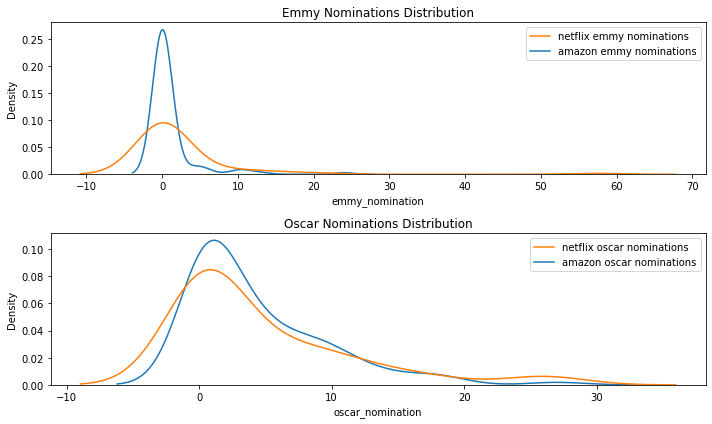

In [83]:
fig, ax = plt.subplots(2, figsize = (10, 6))
ax[0] = sns.kdeplot(data = amazon_e, x = 'emmy_nomination', ax = ax[0], label = 'amazon emmy nominations')
ax[0] = sns.kdeplot(data = Net_e, x = 'emmy_nomination', ax = ax[0], label = 'netflix emmy nominations')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend([handles[idx] for idx in [1,0]],[labels[idx] for idx in [1,0]])

ax[0].set_title('Emmy Nominations Distribution')

ax[1] = sns.kdeplot(data = amazon_o, x = 'oscar_nomination', ax = ax[1], label ='amazon oscar nominations')
ax[1] = sns.kdeplot(data = Net_o, x = 'oscar_nomination', ax = ax[1], label = 'netflix oscar nominations')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend([handles[idx] for idx in [1,0]],[labels[idx] for idx in [1,0]])

ax[1].set_title('Oscar Nominations Distribution')

fig.tight_layout()

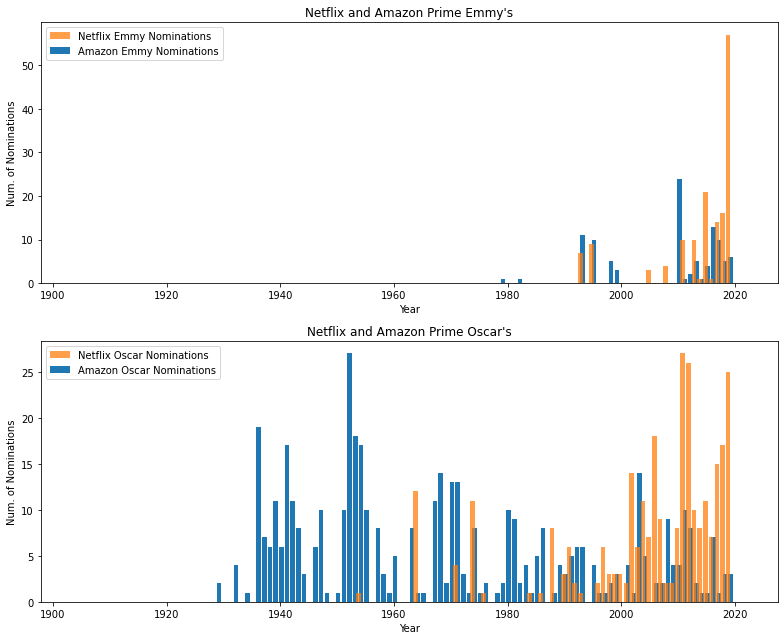

In [84]:
fig, axs = plt.subplots(2)
#fig.set_size_inches(8,8)
fig.set_size_inches(11,9)

axs[0].set_title("Netflix and Amazon Prime Emmy's")
am = axs[0].bar(amazon_x+0.2, amazon_y, label ='Amazon emmy nominations', linewidth = 2.5)
ne = axs[0].bar(Net_x-0.2, Net_y, label ='Netflix emmy nominations', linewidth = 2.5, alpha = .75)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Num. of Nominations')
axs[0].legend([ne,am], ['Netflix Emmy Nominations', 'Amazon Emmy Nominations'])

axs[1].set_title("Netflix and Amazon Prime Oscar's")
am1= axs[1].bar(amazon_o_x+0.2, amazon_o_y, label = 'Amazon oscar nominations', linewidth = 2.5)
ne1= axs[1].bar(Net_o_x-0.2, Net_o_y, label ='Netflix oscars nominations', linewidth = 2.5, alpha = .75)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Num. of Nominations')
axs[1].legend([ne1,am1], ['Netflix Oscar Nominations', 'Amazon Oscar Nominations'])

fig.tight_layout()

In [85]:
df2['genres'] = df2['genres'].fillna('Unknown').apply(lambda g: g.split(',')[0] if len(g.split(','))>1 else g)
df2['genres'].value_counts()

Comedy                       1906
Drama                        1599
Action                       1378
Unknown                      1056
Documentary                   927
                             ... 
Cult Movies                     1
Movies                          1
Music Videos and Concerts       1
Classic & Cult TV               1
Unscripted                      1
Name: genres, Length: 68, dtype: int64

In [86]:
df2['country'] = df2['country'].fillna('Unknown').apply(lambda c: c.split(',')[0] if len(c.split(','))>1 else c)
df2['country'].value_counts()

United States       5086
India                966
United Kingdom       926
Unknown              845
Canada               486
                    ... 
Aruba                  1
Congo - Kinshasa       1
Jordan                 1
Liechtenstein          1
Morocco                1
Name: country, Length: 98, dtype: int64

In [87]:
df2

,Title,Year,Age,Amazon,IMDb,Netflix,Rotten Tomatoes,Type,country,emmy_nomination,emmy_win,genres,oscar_nomination,oscar_win,runtime,votes
0,#Alive,2020,TV-MA,0,6.3,1,62/100,movie,South Korea,NaN,NaN,Horror Movies,NaN,NaN,99.0,34665
1,#AnneFrank. Parallel Stories,2019,Argentina:13,0,6.5,1,54/100,movie,Italy,NaN,NaN,Drama,NaN,NaN,92.0,1409
2,#FriendButMarried,2018,TV-G,0,7.0,1,47/100,movie,Indonesia,NaN,NaN,Dramas,NaN,NaN,102.0,282
3,#FriendButMarried 2,2020,TV-G,0,7.0,1,47/100,movie,Indonesia,NaN,NaN,Dramas,NaN,NaN,104.0,282
4,#IMomSoHard Live,2019,16+,1,5.9,0,40/100,tvshow,United States,NaN,NaN,Arts,NaN,NaN,NaN,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11390,天国的嫁衣,2004,Argentina:Atp,0,6.2/10,1,30/100,tvshow,United Kingdom,NaN,NaN,Unknown,NaN,NaN,149.0,640308
11391,行医,2011,Argentina:13,0,8.2/10,1,31/100,tvshow,United States,NaN,NaN,Unknown,NaN,NaN,158.0,367670
11392,那年花開月正圓,2017,7+,1,7.8/10,0,38/100,tvshow,United States,NaN,NaN,Unknown,NaN,NaN,158.0,367675
11393,阳关道,2018,Argentina:13,0,3.2/10,1,29/100,tvshow,United States,NaN,NaN,Unknown,NaN,NaN,158.0,367670


In [88]:
df2[['emmy_nomination', 'genres']].groupby('genres').count().sort_values(
    by = 'emmy_nomination', ascending= False).head(20)

,emmy_nomination
genres,
Action,14
Drama,11
Comedy,7
Crime TV Shows,5
Crime,4
Unknown,3
Docuseries,3
Documentary,3
Reality-TV,2


In [89]:
df2[['oscar_nomination', 'genres']].groupby('genres').count().sort_values(
    by = 'oscar_nomination', ascending= False).head(20)

,oscar_nomination
genres,
Drama,73
Comedy,43
Action,30
Biography,30
Adventure,20
Crime,16
Documentary,10
Documentaries,7
Dramas,4


In [90]:
df2[['emmy_nomination', 'genres', 'country']].groupby(['genres', 'country']).count().sort_values(
    by = 'emmy_nomination', ascending= False).head(20)

,,emmy_nomination
genres,country,
Action,United States,12
Drama,United States,9
Crime TV Shows,United States,5
Comedy,United States,5
Crime,United States,4
Docuseries,United States,3
Documentary,United States,3
Animation,United States,2
Unknown,United States,2


In [91]:
df2[['oscar_nomination', 'genres', 'country']].groupby(['genres', 'country']).count().sort_values(
    by = 'oscar_nomination', ascending= False).head(20)

,,oscar_nomination
genres,country,
Drama,United States,62
Comedy,United States,36
Action,United States,27
Biography,United States,17
Adventure,United States,17
Crime,United States,14
Biography,United Kingdom,11
Documentary,United States,7
Drama,United Kingdom,5


In [92]:
df= pd.read_csv('data/main_final_2.csv')

In [93]:
# Drop columns that are not required for this analysis.
col_to_drop = ['emmy_nomination', 'emmy_win', 'oscar_nomination', 'oscar_win']
df.drop(col_to_drop, axis=1, inplace=True)

In [94]:
# Clean up the IMDb and Rotten Tomatoes columns and normalize IMDb ratings
# so that both columns have the same scale and format.
df['IMDb'] = df['IMDb'].str.replace("/10","")
df['IMDb'] = df['IMDb'].astype(float)*10
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace("/100","")
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].astype(float)

In [95]:
#updating video movies, tv short to movies.  Delete types music video, podcast and episode
df.loc[df['Type'].isin(['tv short','video movie']),'Type'] ='movie'
df.drop(df[df['Type'].isin(['podcast episode','music video','episode'])].index, inplace = True)


In [96]:
df.loc[df['Netflix']==1,'Streaming Service'] ='Netflix'
df.loc[df['Amazon']==1,'Streaming Service'] ='Amazon'

In [97]:
#cleaning up genres and creating a smaller genre list
#Source: https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows#:~:text=Series%20and%20DataFrame%20methods%20define,call%20explode%20on%20that%20column.
def tidy_split(df, column, sep='|', keep=False):
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
            values = map(str.strip, presplit.split(sep))
            if keep and len(values) > 1:
                indexes.append(i)
                new_values.append(presplit)
            for value in values:
                value = value.replace(" Movies", "")
                value = value.replace(" TV Shows", "")
                value = value.replace("\' TV", "")
                value = value.replace("TV ", "")
                #g = g.replace("Music", "Music & Musicals")
                #g = g.replace("Musicals", "Music & Musicals")
                value = value.replace("Faith & Spirituality", "Faith and Spirituality")
                value = value.replace("Reality TV", "Reality-TV")
                value = value.replace("Anime Features", "Anime")
                value = value.replace("Anime Series", "Anime")
                value = value.replace("British", "International")
                value = value.replace("Spanish-Language", "International")
                value = value.replace("Comedies", "Comedy")
                value = value.replace("Dramas", "Drama")
                value = value.replace("Documentaries", "Documentary")
                value = value.replace("Sports", "Sport")
                value = value.replace("Classic & Cult TV", "Cult")
                value = value.replace("Classic", "Cult")
                value = value.replace("Romantic", "Romance") 
                value = value.replace("Mysteries", "Mystery")

                if(value == 'Family'):
                    value = 'Children & Family'
                if value=='and Culture' or value =='Arts' or value == 'Entertainment':
                    value='Arts and Culture'
                if value=='Thrillers':
                    value='Thriller'
    #             if value=='Anime':
    #                 value='Animation'

                indexes.append(i)
                new_values.append(value)
        
            #print(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [98]:
df_genres = tidy_split(df[['Title','genres','IMDb','Year','Type','Streaming Service']],'genres',',', False)
#df_genres.genres.unique()

In [99]:
df_heat = df_genres.groupby(['Streaming Service','genres','Type'],as_index=False)[["Title","IMDb"]].agg({'Title': 'count','IMDb':'mean'}).sort_values('Title', ascending=False)


In [100]:
df_heat['merge'] = df_heat['Streaming Service'] + " (" + df_heat['Type'] + ")"

In [101]:
df_heat[df_heat['Title'] >50].sort_values('IMDb', ascending=False)

,Streaming Service,genres,Type,Title,IMDb,merge
123,Netflix,Korean,tvshow,62,76.688525,Netflix (tvshow)
94,Netflix,Anime,tvshow,56,76.490909,Netflix (tvshow)
22,Amazon,Documentary,tvshow,200,75.384615,Amazon (tvshow)
108,Netflix,Docuseries,tvshow,87,74.247059,Netflix (tvshow)
25,Amazon,Drama,tvshow,296,73.573883,Amazon (tvshow)
...,...,...,...,...,...,...
77,Amazon,Thriller,movie,523,54.781609,Amazon (movie)
0,Amazon,Action,movie,684,54.771723,Amazon (movie)
117,Netflix,Horror,movie,189,53.590164,Netflix (movie)
59,Amazon,Sci-Fi,movie,162,51.537037,Amazon (movie)


In [102]:
df_simple = df_heat[df_heat['Title'] >50].groupby(['genres'],as_index=False).mean().sort_values('IMDb', ascending=False)
#df_simple

In [103]:
df_heat_pivot = df_heat[df_heat['Title'] >50].pivot_table(index="genres", columns="merge", values="IMDb")

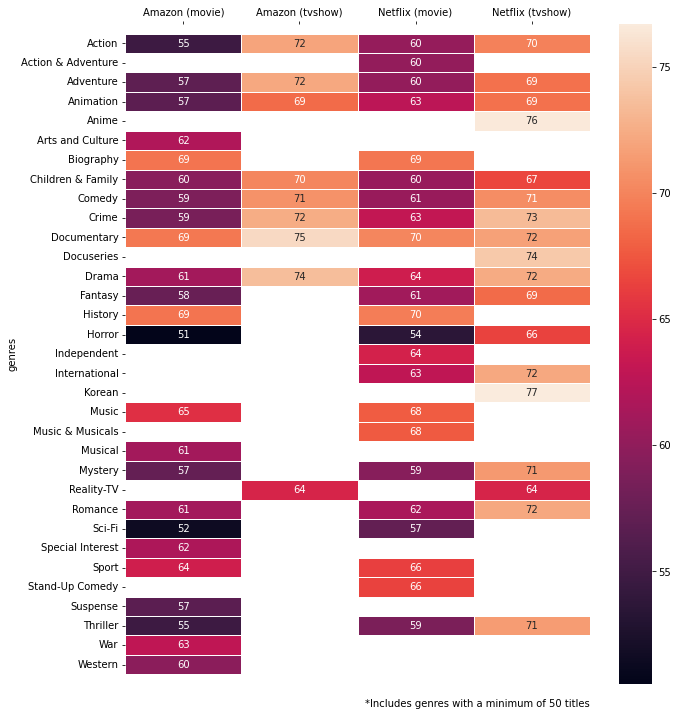

In [104]:
#Mapping the correlations between ratings of individual genres against Amazon and Netflix movies and TV shows. 
plt.figure(figsize = (10,10))
ax = sns.heatmap(df_heat_pivot,annot=True, linewidths=.5)
ax.set_xlabel('')
ax.xaxis.set_ticks_position('top') 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.annotate('*Includes genres with a minimum of 50 titles',
            xy = (1.0, -0.03),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)
plt.tight_layout()

In [105]:
df_heat[df_heat['Title'] >50].sort_values('IMDb', ascending=False)

,Streaming Service,genres,Type,Title,IMDb,merge
123,Netflix,Korean,tvshow,62,76.688525,Netflix (tvshow)
94,Netflix,Anime,tvshow,56,76.490909,Netflix (tvshow)
22,Amazon,Documentary,tvshow,200,75.384615,Amazon (tvshow)
108,Netflix,Docuseries,tvshow,87,74.247059,Netflix (tvshow)
25,Amazon,Drama,tvshow,296,73.573883,Amazon (tvshow)
...,...,...,...,...,...,...
77,Amazon,Thriller,movie,523,54.781609,Amazon (movie)
0,Amazon,Action,movie,684,54.771723,Amazon (movie)
117,Netflix,Horror,movie,189,53.590164,Netflix (movie)
59,Amazon,Sci-Fi,movie,162,51.537037,Amazon (movie)


In [106]:
df_year = df_genres[((df['Year']>1990))].groupby(['Year','genres','Type'],as_index=False)[["Title","IMDb", "Streaming Service"]].agg({'Title': 'count','IMDb':'mean', 'Streaming Service': 'min'}).sort_values(['genres','Year'])


/var/folders/h5/6b6s2cwd2m19kydv6p77mmdh0000gn/T/ipykernel_14313/3971782094.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_year = df_genres[((df['Year']>1990))].groupby(['Year','genres','Type'],as_index=False)[["Title","IMDb", "Streaming Service"]].agg({'Title': 'count','IMDb':'mean', 'Streaming Service': 'min'}).sort_values(['genres','Year'])


In [107]:
#plotting genres 
net = alt.Chart(df_heat[(df_heat['Streaming Service'] =='Netflix') & (df_heat['Title'] >50)], title="Netlix").mark_bar().encode(
    x=alt.X('genres', sort='-y',axis=alt.Axis(grid=False)),
    y=alt.Y('sum(Title):Q',axis=alt.Axis(title ="Number of Titles",grid=False)),
    tooltip=['Title', 'IMDb','Streaming Service'],
    color=alt.value('#ff7f0e')
).properties(
    height=400,
    width=400).interactive()



In [108]:
#plotting genres 
ama =alt.Chart(df_heat[(df_heat['Streaming Service'] =='Amazon') & (df_heat['Title'] >50)], title="Amazon").mark_bar().encode(
    x=alt.X('genres', sort='-y',axis=alt.Axis(grid=False)),
    y=alt.Y('sum(Title):Q' ,axis=alt.Axis(title ="Number of Titles",grid=False)),
    tooltip=['Title', 'IMDb','Streaming Service']
).properties(
    height=400,
    width=400).interactive()

In [109]:
net | ama

alt.HConcatChart(...)

In [110]:
df_IMDb = df[(df['Year']>1900)].sort_values(['IMDb'], ascending = False).head(20)
df_IMDb

,Title,Year,Age,Amazon,IMDb,Netflix,Rotten Tomatoes,Type,country,genres,runtime,votes,Streaming Service
7567,Ruby's Studio: the Feelings Show,2010,United States:TV-Y,1,98.0,0,47.0,movie,United States,Family,46.0,12,Amazon
9926,The Secret World of Nature: Spain,2020,7+,1,96.0,0,51.0,tvshow,United States,NaN,130.0,46,Amazon
10246,Therapy,2021,TV-PG,0,95.0,1,45.0,tvshow,United States,Drama,15.0,6,Netflix
5649,Malgudi Days,1987,all,1,95.0,0,62.0,tvshow,India,NaN,NaN,3748,Amazon
11389,जान तेरे नाम,1992,Australia:X18+,1,95.0,0,40.0,tvshow,India,"Biography,Crime,Drama,Thriller",54.0,135001,Amazon
1544,Breaking Bad,2008,TV-MA,0,94.0,1,100.0,tvshow,United States,"Crime,Drama,Thriller",49.0,1630176,Netflix
6721,Ostatni ludzie Czarnobyla,2018,NaN,1,94.0,0,47.0,movie,Poland,Documentary,52.0,8,Amazon
2982,Everyday Driver,2017,NaN,1,93.0,0,52.0,tvshow,United States,Documentary,22.0,150,Amazon
2135,Cosmos,2014,13+,1,93.0,0,82.0,movie,United States,"Action, Science Fiction",129.0,0,Amazon
903,Avatar: The Last Airbender,2005,TV-Y7,1,93.0,1,93.0,tvshow,United States,"Action,Adventure,Animation",23.0,281182,Amazon


In [111]:
# Top 10 movies by IMBD rating
alt.Chart(
    df_IMDb,
).mark_bar().encode(
    x=alt.X('Title:N', sort='-y'),
    y=alt.Y('IMDb:Q'),
    color=alt.Color('Streaming Service'),
    tooltip=['Title', 'IMDb', 'Year', 'genres', 'Streaming Service', 'country','Type']

).transform_window(
    rank='rank(IMDb)',
    sort=[alt.SortField('IMDBb', order='descending')]
).transform_filter(
    (alt.datum.rank < 10)
).interactive()

alt.Chart(...)